# DTEK0042 Exercise 3
    Group Members:
    1. Milja Lempinen
    2. Helena Lähdesniemi
    3. Jeremi Nyyssönen

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [173]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

[[1.57253573e+09 1.09194000e+05 1.54836000e+05 5.07500000e+03]
 [1.57253573e+09 1.09190000e+05 1.54820000e+05 5.10700000e+03]
 [1.57253573e+09 1.09210000e+05 1.54852000e+05 5.07600000e+03]
 ...
 [1.57253606e+09 1.08492000e+05 1.57941000e+05 6.10700000e+03]
 [1.57253606e+09 1.08443000e+05 1.57922000e+05 6.09100000e+03]
 [1.57253606e+09 1.08431000e+05 1.57884000e+05 6.12900000e+03]]


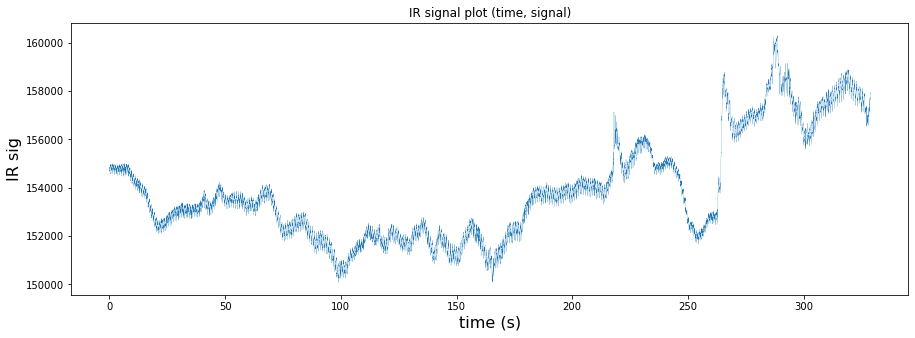

In [174]:
PPG_data = np.loadtxt("/Users/miljalempinen/Documents/Pythontreeni/PPG_record.txt", delimiter=",")
PPG_data.shape
print(PPG_data)
PPG_sig = PPG_data[:,2]
time = np.linspace(0, len(PPG_sig)/132, len(PPG_sig)) #
plt.figure(figsize=(15,5))
plt.title("IR signal plot (time, signal)")
plt.xlabel("time (s)",fontsize=16)
plt.ylabel("IR sig",fontsize=16)
plt.plot(time,PPG_sig,linewidth=0.2)
plt.show()

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

The indices in the PSD where the frequencies are between 0.7 and 3Hz[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
The dominant frequency: [1.3]Hz


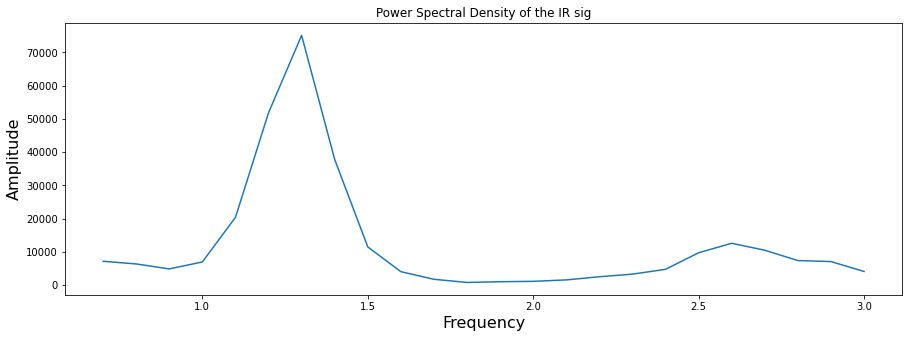

In [175]:
from scipy import signal

PSD_freqs, PSD = scipy.signal.welch(PPG_sig, fs=132, nperseg=132*10)

PSD_freqs2 = np.where((PSD_freqs>=0.7)&(PSD_freqs<=3))
print('The indices in the PSD where the frequencies are between 0.7 and 3Hz'+str(PSD_freqs2[0]))
PSD = PSD[7:31] #These are the indices found in the PSD_freqs2 by printing it

PSD_freqs = PSD_freqs[(PSD_freqs>=0.7) & (PSD_freqs<=3)]

plt.figure(figsize=(15,5))
plt.title("Power Spectral Density of the IR sig")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(PSD_freqs, PSD)

PSD_max = np.amax(PSD)
dominant_freq = PSD_freqs[np.where(PSD==PSD_max)]
print('The dominant frequency: '+str(dominant_freq)+'Hz')

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

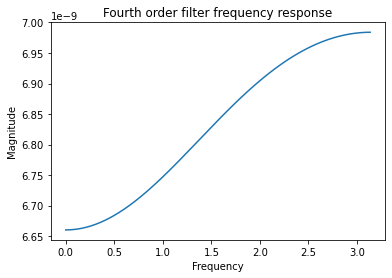

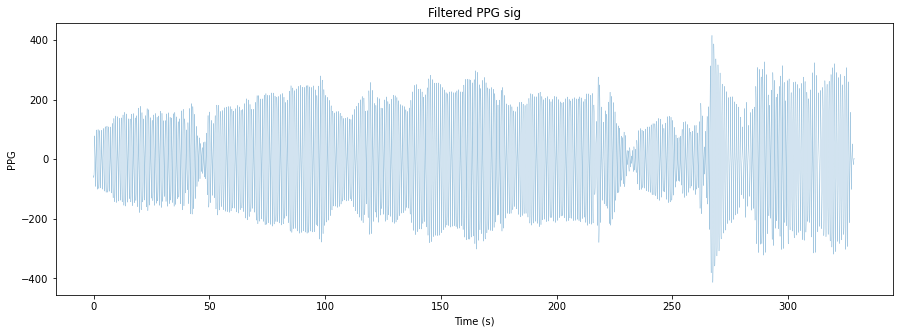

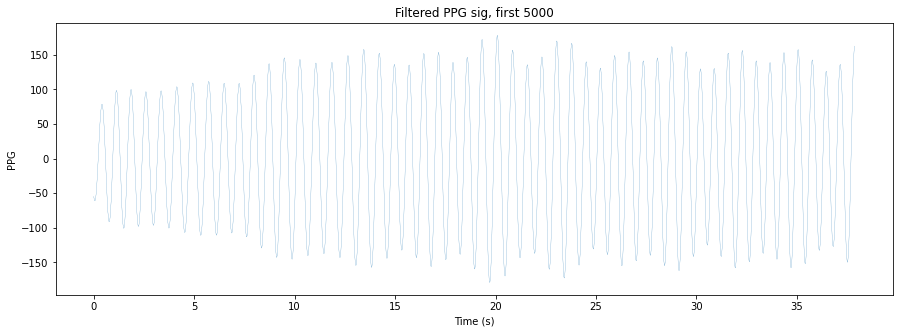

In [176]:
from scipy.signal import butter, filtfilt, freqz

def butterworth_bandpass( lowcut, highcut, order):
    nyq = 0.5 * 132
    low = lowcut / nyq
    high = highcut / nyq
    b,a = scipy.signal.butter(order,[low,high],'bandpass', 132)
    return b,a

#Butterworth fourth order filter
b1 = butterworth_bandpass(dominant_freq-0.3,dominant_freq+0.3,4)
h1, w1 = scipy.signal.freqz(b1[0],b1[1],plot=lambda w1, h1: plt.plot(w1, np.abs(h1)))
plt.title("Fourth order filter frequency response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


nyq = 0.5 * 132
low = (dominant_freq-0.3) / nyq
high = (dominant_freq+0.3) / nyq


b,a = scipy.signal.butter(4,[low,high],'bandpass')
filtered_signal = scipy.signal.filtfilt(b, a, PPG_sig)

plt.figure(figsize=(15,5))
plt.title("Filtered PPG sig")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(time, filtered_signal, linewidth=0.2)
plt.show()

plt.figure(figsize=(15,5))
plt.title("Filtered PPG sig, first 5000")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(time[:5000], filtered_signal[:5000], linewidth=0.2)
plt.show()

## Observations:
The signal after filtering is much clearer, the baseline wander is no longer present and the peaks can be seen very clearly.
The filter seems to be efficient in removing noise.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

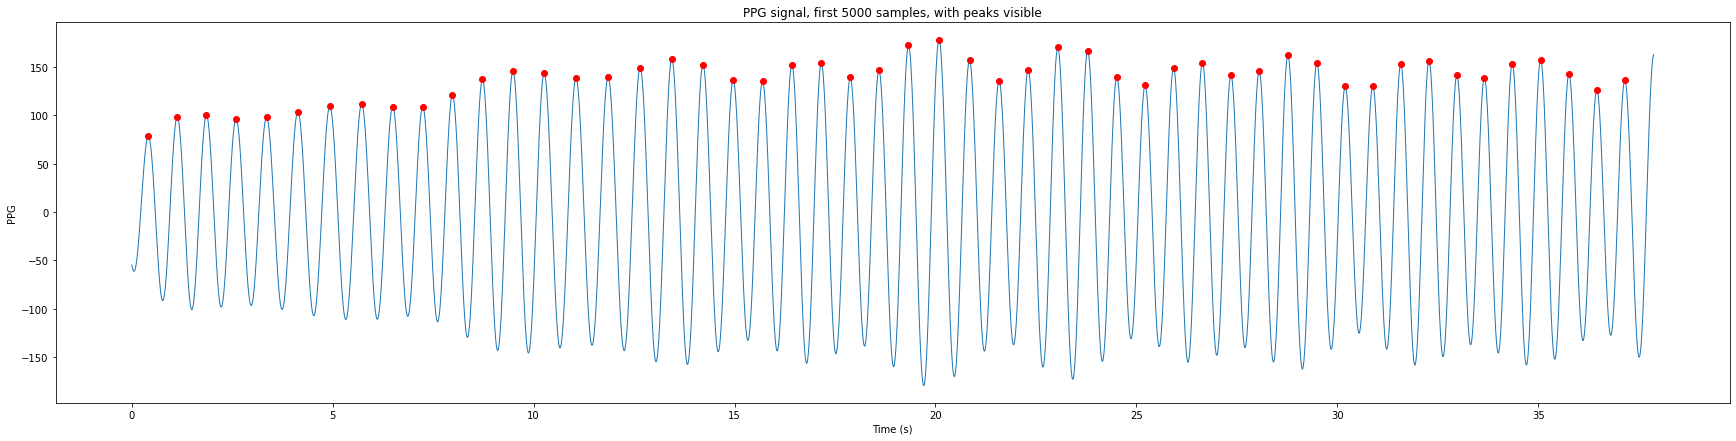

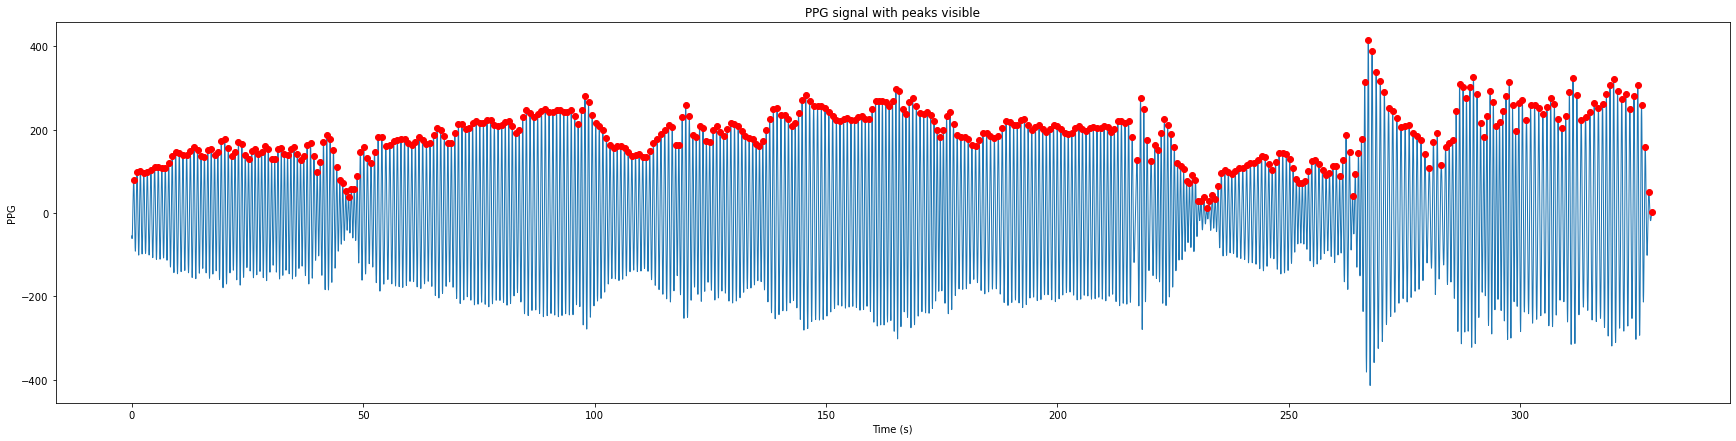

Heart rate: 78.45bps


In [177]:
from scipy.signal import argrelextrema

peaks = scipy.signal.argrelextrema(filtered_signal, np.greater)

peaks_5000 = scipy.signal.argrelextrema(filtered_signal[:5000], np.greater)

fig = plt.figure(figsize=(30,7))
plt.plot(time[:5000], filtered_signal[:5000], label="filtered signal", linewidth=1)
plt.title("PPG signal, first 5000 samples, with peaks visible")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(time[peaks_5000],first_5000[peaks_5000],"ro")
plt.show()

fig = plt.figure(figsize=(30,7))
plt.plot(time, filtered_signal, label="filtered signal", linewidth=1)
plt.title("PPG signal with peaks visible")
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.plot(time[peaks],filtered_signal[peaks],"ro")
plt.show()


RR_intervals = np.diff(time[peaks])
avg_peak_intervals = np.mean(RR_intervals)

HeartRate = 60.0/avg_peak_intervals 
print('Heart rate: '+str(round(HeartRate, 2))+'bps')

## Observations: 
The process of finding the peaks from the signal was quite simple and clear.
The heart rate obtained (~79bps) was in the range of normal heart rate for humans. 

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [178]:
avnn = 1000*avg_peak_intervals
print('AVNN: '+str(avnn)+' ms')
sdnn = 1000*np.std(RR_intervals)
print('SDNN: '+str(sdnn)+' ms')
rmssd = 1000*np.sqrt(np.mean(np.square(np.diff(RR_intervals))))
print('RMSSD: '+str(rmssd)+' ms')

AVNN: 764.8512728743882 ms
SDNN: 64.59041581494571 ms
RMSSD: 34.360083234749276 ms


## Observations:
We learned to explore the HRV. The different calculations done here were not at first clear, but with some deeper reading possible.
The values obtained are all in milliseconds and seem to be in the normal range (https://www.sciencedirect.com/science/article/pii/S0735109797005548). 